Rreading and printing the data from the file

In [1234]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
rf = pd.read_csv("data.csv")
x=rf.drop(columns=['j:t'])
y = rf.drop(columns=['a:n', 'b:c', 'c:c', 'd:n',
            'e:b', 'f:b', 'g:c', 'h:c', 'i:b'])
le = LabelEncoder()
ypreproc = pd.DataFrame.copy(y)
ypreproc['j:t'] = le.fit_transform(ypreproc['j:t'])
x_preproc = pd.DataFrame.copy(x)
x_preproc['b:c'] = le.fit_transform(x_preproc['b:c'])
x_preproc['c:c'] = le.fit_transform(x_preproc['c:c'])
x_preproc['g:c'] = le.fit_transform(x_preproc['g:c'])
x_preproc['h:c'] = le.fit_transform(x_preproc['h:c'])
x_preproc['e:b'] = le.fit_transform(x_preproc['e:b'])
x_preproc['f:b'] = le.fit_transform(x_preproc['f:b'])
x_preproc['i:b'] = le.fit_transform(x_preproc['i:b'])
#x_preproc['j:t'] = le.fit_transform(x_preproc['j:t'])
xr = x_preproc
yr=ypreproc
xr

,a:n,b:c,c:c,d:n,e:b,f:b,g:c,h:c,i:b
0,24,1,2,3,1,0,1,2,1
1,45,0,2,10,1,0,2,3,1
2,43,1,2,7,1,0,2,3,1
3,42,2,1,9,1,0,2,2,1
4,36,2,2,8,1,0,2,1,1
...,...,...,...,...,...,...,...,...,...
995,21,1,0,3,1,1,2,0,0
996,25,1,2,4,1,1,2,1,1
997,28,1,2,6,1,0,1,3,1
998,36,1,3,11,1,0,0,3,0


split the data for training and testing data

KNN implemtation

In [1235]:
import numpy as np
def destance_evaluation(first,second):

    destance =0 
    destance+=np.abs(first['a:n'] - second['a:n'])
    destance += np.abs(first['d:n'] - second['d:n'])
    if first['b:c'] != second['b:c']:
        destance+=1
    if first['c:c'] != second['c:c']:
        destance += 1
    if first['f:b'] != second['f:b']:
        destance += 1
    if first['e:b'] != second['e:b']:
        destance += 1
    if first['g:c'] != second['g:c']:
        destance += 1
    if first['h:c'] != second['h:c']:
        destance += 1
    if first['i:b'] != second['i:b']:
        destance += 1
    #print(destance)
    return destance

In [1236]:
def get_the_knn(sample,k,x_tr):
    temp = list()
    
    for i in range(len(x_tr['a:n'])):
        l =[]
        l.append(i)
        l.append(destance_evaluation(sample, x_tr.iloc[i]))
        temp.append(l)
    temp.sort(key = lambda x :x[1])
    temp = temp[1:k+1]
    # print(temp)
    return temp

In [1237]:
from random import randint
from collections import defaultdict
def knn():
    
    result = {}
    five_random_elemnet = {}
    for i in range(5):
        r = randint(0, 999)
        five_random_elemnet[r] = rf.iloc[r]
        
    
    for j in five_random_elemnet:
        result[j]=(get_the_knn(five_random_elemnet[j],3,rf))
   
    for i in result:
        print(f"\nsample number {i}: \nthe three neraest naboures: \n")
        for j in range(len(result[i])):
            
            print(f"sample number\t   destance\n  {result[i][j][0]}\t\t\t{result[i][j][1]}\n")
                   


In [1238]:

knn()


sample number 38: 
the three neraest naboures: 

sample number	   destance
  411			2

sample number	   destance
  216			4

sample number	   destance
  293			4


sample number 402: 
the three neraest naboures: 

sample number	   destance
  25			3

sample number	   destance
  17			4

sample number	   destance
  18			4


sample number 929: 
the three neraest naboures: 

sample number	   destance
  601			1

sample number	   destance
  981			1

sample number	   destance
  606			2


sample number 237: 
the three neraest naboures: 

sample number	   destance
  136			1

sample number	   destance
  482			1

sample number	   destance
  524			1


sample number 187: 
the three neraest naboures: 

sample number	   destance
  127			3

sample number	   destance
  121			4

sample number	   destance
  371			4



10 Flod cross validation and find the value of k from {1,2,3,4,5}

In [1239]:
def knn_accuracy(x_tes,y_tr,x_tr,k):
    result = {}
    
    for i in range(len(x_tes)):
       
       result[i] = get_the_knn(x_tes.iloc[i], k, x_tr)
    prediction = []
    for i in result:
       cnt_true = 0
       cnt_false = 0
       for j in range(len(result[i])):
          if int(y_tr.iloc[result[i][j][0]]) == 1:
            cnt_true+=1
          else:
            cnt_false+=1
       if cnt_true > cnt_false:
          prediction.append([i,1])
       else :
          prediction.append([i,0])

       
    return prediction               
    

In [1240]:
def kflod_cross_validation(train,test):
    x_tr = xr.iloc[train]
    x_tes = xr.iloc[test]
    y_tr = yr.iloc[train]
    y_tes = yr.iloc[test]
    return x_tr,x_tes,y_tr,y_tes


In [1241]:
import matplotlib.pyplot as plt
def plot_and_print(k_accuracy):
    for i in k_accuracy:
        print(f"k : {i}\taccuracy : {k_accuracy[i]}")
    k_values = np.array(list(k_accuracy.keys()))
    acc_values = np.array(list(k_accuracy.values()))
    plt.plot(k_values, acc_values)
    plt.xlabel("K")
    plt.ylabel("Accuracy")
    plt.title("K vs Accuracy")
    plt.show()


In [1242]:
from sklearn.model_selection import KFold
def cross_validation_and_accuracy():
    kf = KFold(n_splits=10, shuffle=True, random_state=4)
    k_accuracy = {}
    for k in range(1, 6):
        temp_accuracy = []
        for train, test in kf.split(range(xr.shape[0])):
            x_tr, x_tes, y_tr, y_tes = kflod_cross_validation(train, test)
            prediction = knn_accuracy(x_tes, y_tr, x_tr, k)
            sum = 0
            for i in range(len(prediction)):
                if prediction[i][1] == int(y_tes.iloc[prediction[i][0]]):
                    sum += 1
            temp_accuracy.append(sum/len(y_tes))

        k_accuracy[k] = np.mean(temp_accuracy)
    return k_accuracy

k : 1	accuracy : 0.6049999999999999
k : 2	accuracy : 0.638
k : 3	accuracy : 0.621
k : 4	accuracy : 0.6349999999999999
k : 5	accuracy : 0.6140000000000001


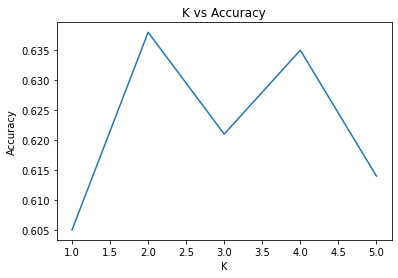

In [1244]:
k_accuracy = cross_validation_and_accuracy()    
plot_and_print(k_accuracy)
